# 1) Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit andmake a table containing R^2 value for each prepared model.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [13]:
df = pd.read_csv("50_Startups (1).csv")

In [14]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [16]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [17]:
df1=df.rename({"R&D Spend":"RDSpend","Marketing Spend":"MarketingS"},axis=1)
df1

,RDSpend,Administration,MarketingS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [18]:
df1[df.duplicated()]

,RDSpend,Administration,MarketingS,State,Profit


In [19]:
df1.describe()

,RDSpend,Administration,MarketingS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [20]:
df1.corr()

,RDSpend,Administration,MarketingS,Profit
RDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


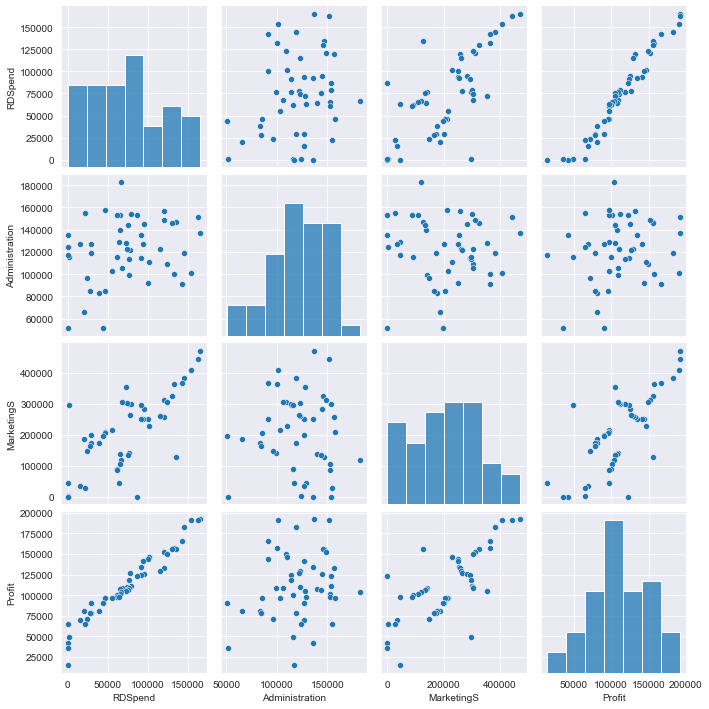

In [22]:
sns.set_style(style="darkgrid")
sns.pairplot(df1)

In [23]:
model = smf.ols("Profit~RDSpend+Administration+MarketingS",data=df1).fit()
model

In [24]:
model.params

Intercept         50122.192990
RDSpend               0.805715
Administration       -0.026816
MarketingS            0.027228
dtype: float64

In [27]:
model.tvalues , np.round(model.pvalues,6)

(Intercept          7.626218
 RDSpend           17.846374
 Administration    -0.525507
 MarketingS         1.655077
 dtype: float64,
 Intercept         0.000000
 RDSpend           0.000000
 Administration    0.601755
 MarketingS        0.104717
 dtype: float64)

In [28]:
model.rsquared , model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [30]:
mlr_a=smf.ols("Profit~Administration",data=df1).fit()
mlr_a.tvalues , mlr_a.pvalues

(Intercept         3.040044
 Administration    1.419493
 dtype: float64,
 Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [31]:
mlr_m=smf.ols("Profit~MarketingS",data=df1).fit()
mlr_m.tvalues , mlr_m.pvalues

(Intercept     7.808356
 MarketingS    7.802657
 dtype: float64,
 Intercept     4.294735e-10
 MarketingS    4.381073e-10
 dtype: float64)

In [32]:
mlr_am=smf.ols("Profit~Administration+MarketingS",data=df1).fit()
mlr_am.tvalues , mlr_am.pvalues

(Intercept         1.142741
 Administration    2.467779
 MarketingS        8.281039
 dtype: float64,
 Intercept         2.589341e-01
 Administration    1.729198e-02
 MarketingS        9.727245e-11
 dtype: float64)

# Model Validation

In [36]:
slr_r=smf.ols("RDSpend~Administration+MarketingS",data=df1).fit().rsquared
vir_r=1/(1-slr_r)
slr_a=smf.ols("Administration~RDSpend+MarketingS",data=df1).fit().rsquared
vir_a=1/(1-slr_a)
slr_m=smf.ols("MarketingS~RDSpend+Administration",data=df1).fit().rsquared
vir_m=1/(1-slr_m)
df2={"Variable":["RDSpend","Administration","MarketingS"],"Vif":[vir_r,vir_a,vir_m]}
Vif_df=pd.DataFrame(df2)
Vif_df

,Variable,Vif
0,RDSpend,2.468903
1,Administration,1.175091
2,MarketingS,2.326773


# QQ Plot

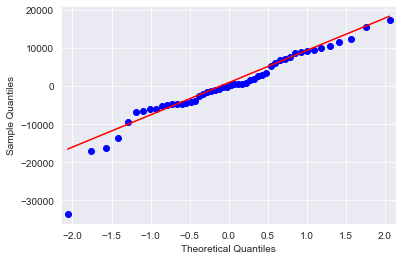

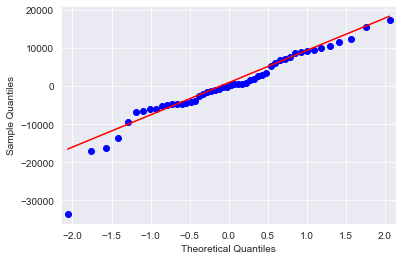

In [37]:
sm.qqplot(model.resid,line="q")

In [38]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [39]:
def std_val(val):
    return (val-val.mean())/val.std()

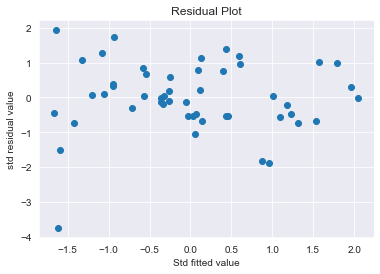

In [40]:
plt.scatter(std_val(model.fittedvalues),std_val(model.resid))
plt.title("Residual Plot")
plt.xlabel("Std fitted value")
plt.ylabel("std residual value")
plt.show()

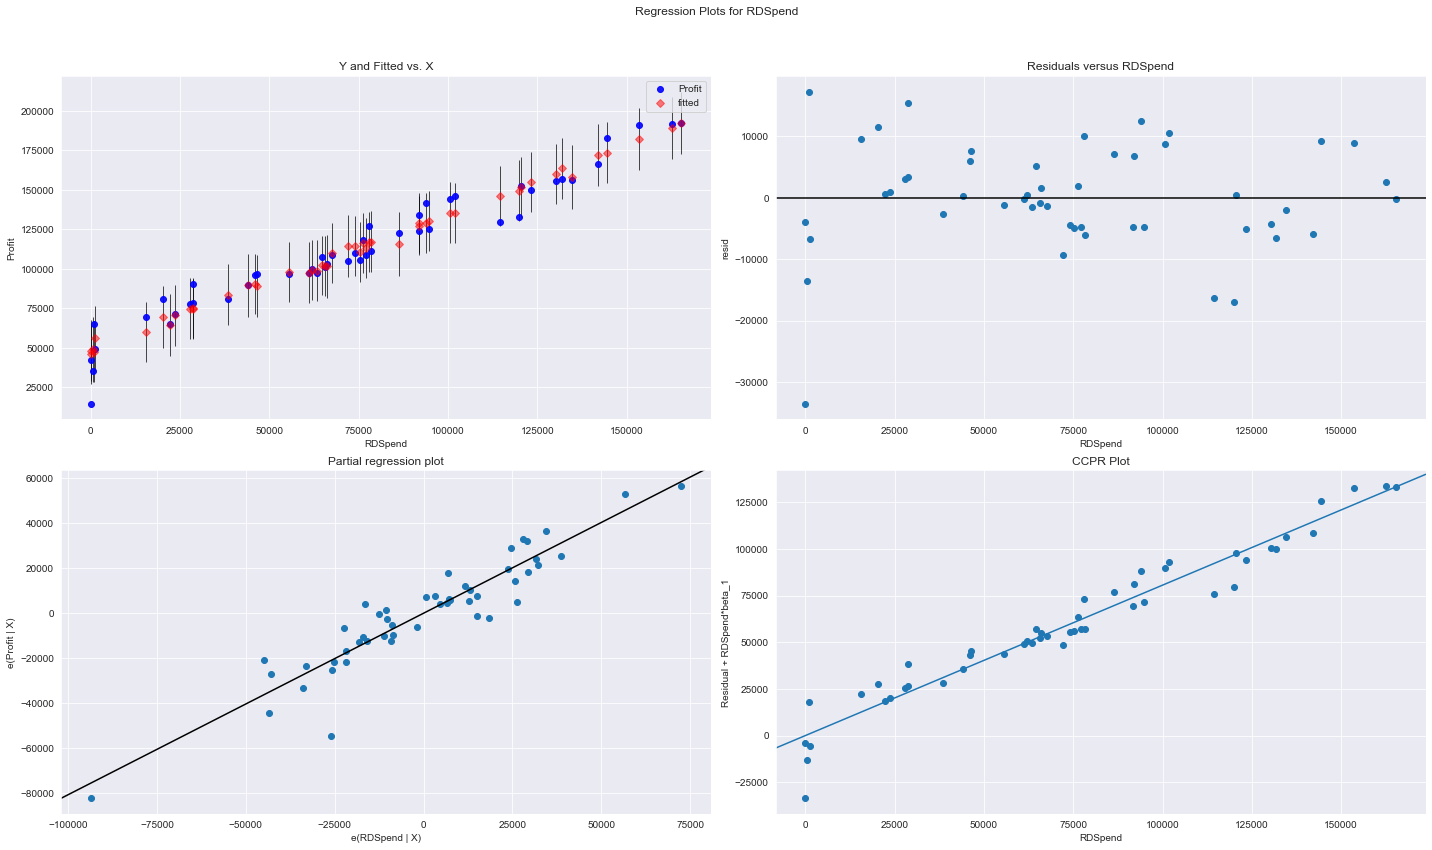

In [41]:
fig1=plt.figure(figsize=(20,12))
sm.graphics.plot_regress_exog(model,"RDSpend",fig=fig1)
plt.show()

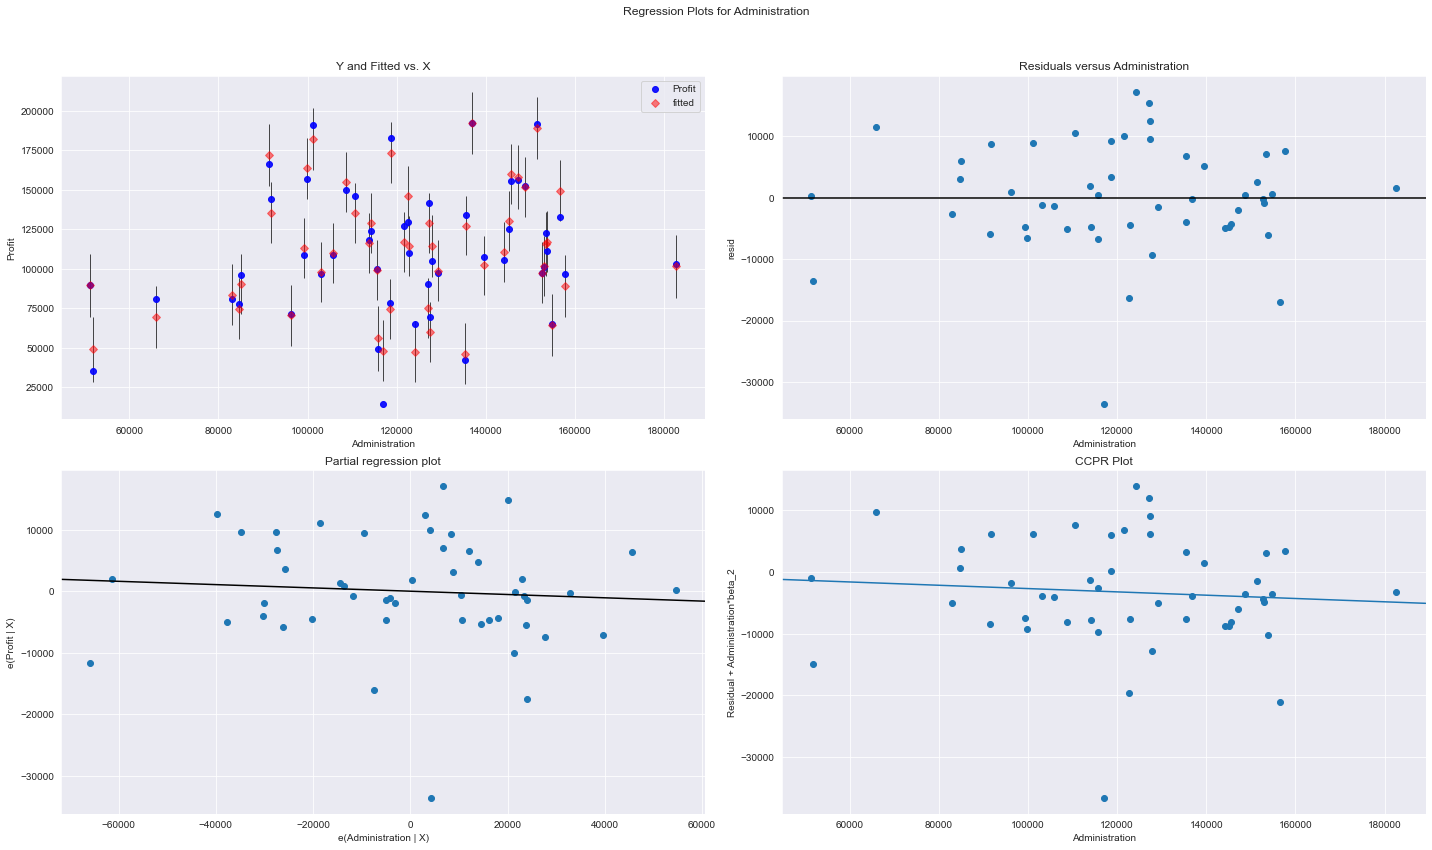

In [42]:
fig1=plt.figure(figsize=(20,12))
sm.graphics.plot_regress_exog(model,"Administration",fig=fig1)
plt.show()

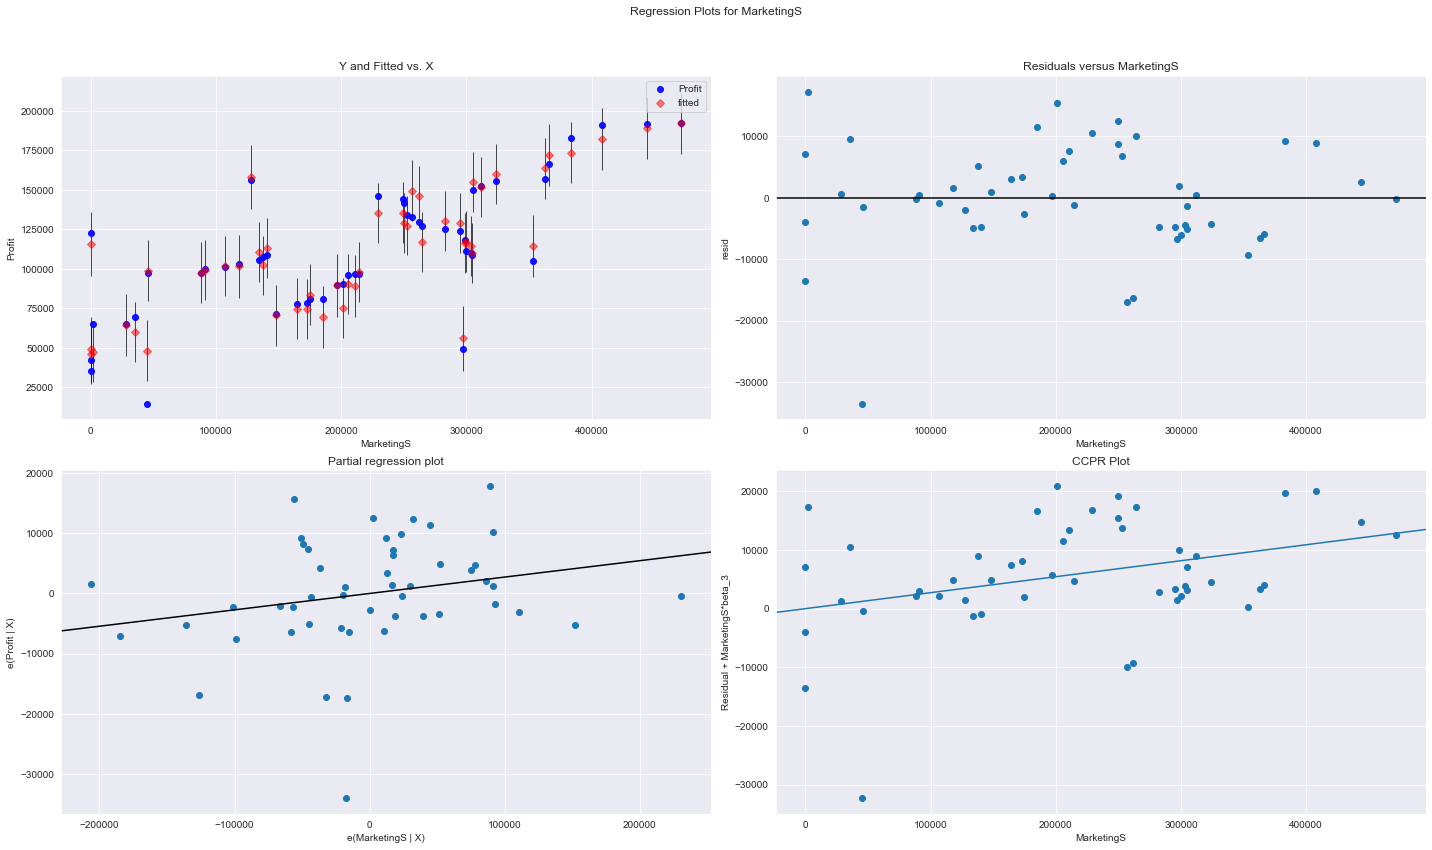

In [43]:
fig1=plt.figure(figsize=(20,12))
sm.graphics.plot_regress_exog(model,"MarketingS",fig=fig1)
plt.show()

# Cook's Distance

In [44]:
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

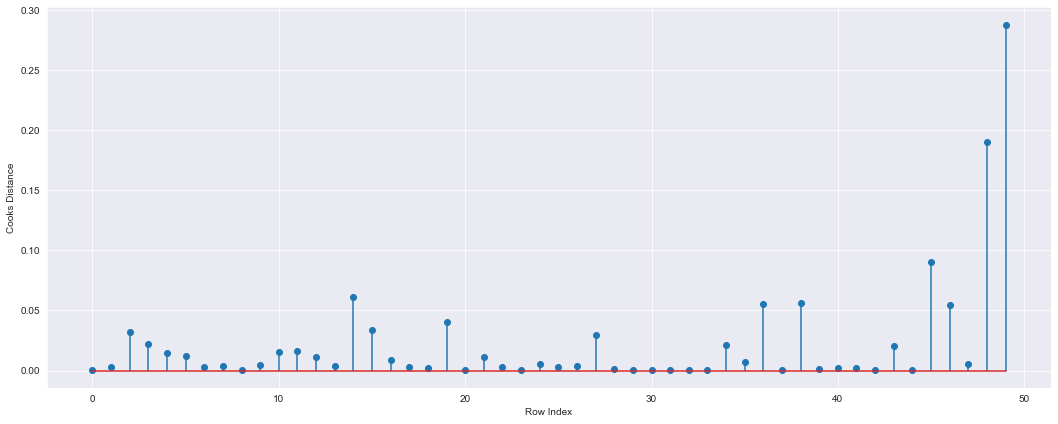

In [47]:
fig2=plt.figure(figsize=(18,7))
plt.stem(np.arange(len(df1)),np.round(c,6))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [48]:
np.argmax(c) , np.max(c)

(49, 0.28808229275432634)

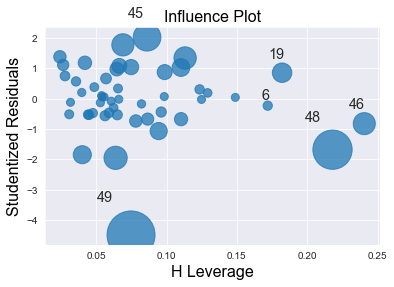

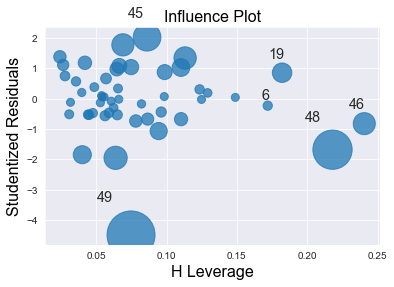

In [49]:
influence_plot(model)

In [50]:
a=df1.shape[1]
b=df1.shape[0]
lcutoff=(3*(a+1))/b
lcutoff

0.36

In [51]:
df1[df1.index.isin([49])]

,RDSpend,Administration,MarketingS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving the model

In [53]:
df2=df1.drop(df1.index[[49]],axis=0).reset_index(drop=True)
df2

,RDSpend,Administration,MarketingS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model Deletion Diagnostics and Final Model

In [65]:
while np.max(c) > 0.5:
    model=smf.ols("Profit~RDSpend+Administration+MarketingS",data=df2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df2=df2.drop(df2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df2
else:
    final_model=smf.ols("Profit~RDSpend+Administration+MarketingS",data=df2).fit()
    final_model.rsquared , final_model.aic
    print("Therefore model1 accuracy improved to",final_model)

Therefore model1 accuracy improved to <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000026917E01B20>


In [66]:
final_model.rsquared , final_model.aic

(0.9613162435129847, 1020.5652974526367)

In [67]:
df2

,RDSpend,Administration,MarketingS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model Predictions

In [68]:
new_data=pd.DataFrame({"RDSpend":85000,"Administration":95000,"MarketingS":105000},index=[0])
new_data

,RDSpend,Administration,MarketingS
0,85000,95000,105000


In [69]:
final_model.predict(new_data)

0    119477.999123
dtype: float64

In [71]:
final_model.predict(df2)

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

# Table containing Rsquared value for each prepared model

In [73]:
df4={"prep_model":["Model","Final_Model"],"R_squared":[model.rsquared,final_model.rsquared]}
Table=pd.DataFrame(df4)
Table

,prep_model,R_squared
0,Model,0.950746
1,Final_Model,0.961316


# Consider only the below columns and prepare a prediction model for predicting Price.

#Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [14]:
toyota=pd.read_csv("ToyotaCorolla.csv")

In [16]:
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
toyota.shape

(1436, 38)

In [5]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [17]:
toyota1=pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,12:14],toyota.iloc[:,15:18]],axis=1)
toyota1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [18]:
toyota2=toyota1.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyota2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [19]:
toyota2[toyota2.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [20]:
toyota3=toyota2.drop_duplicates().reset_index(drop=True)
toyota3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [21]:
toyota3.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [22]:
toyota3.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


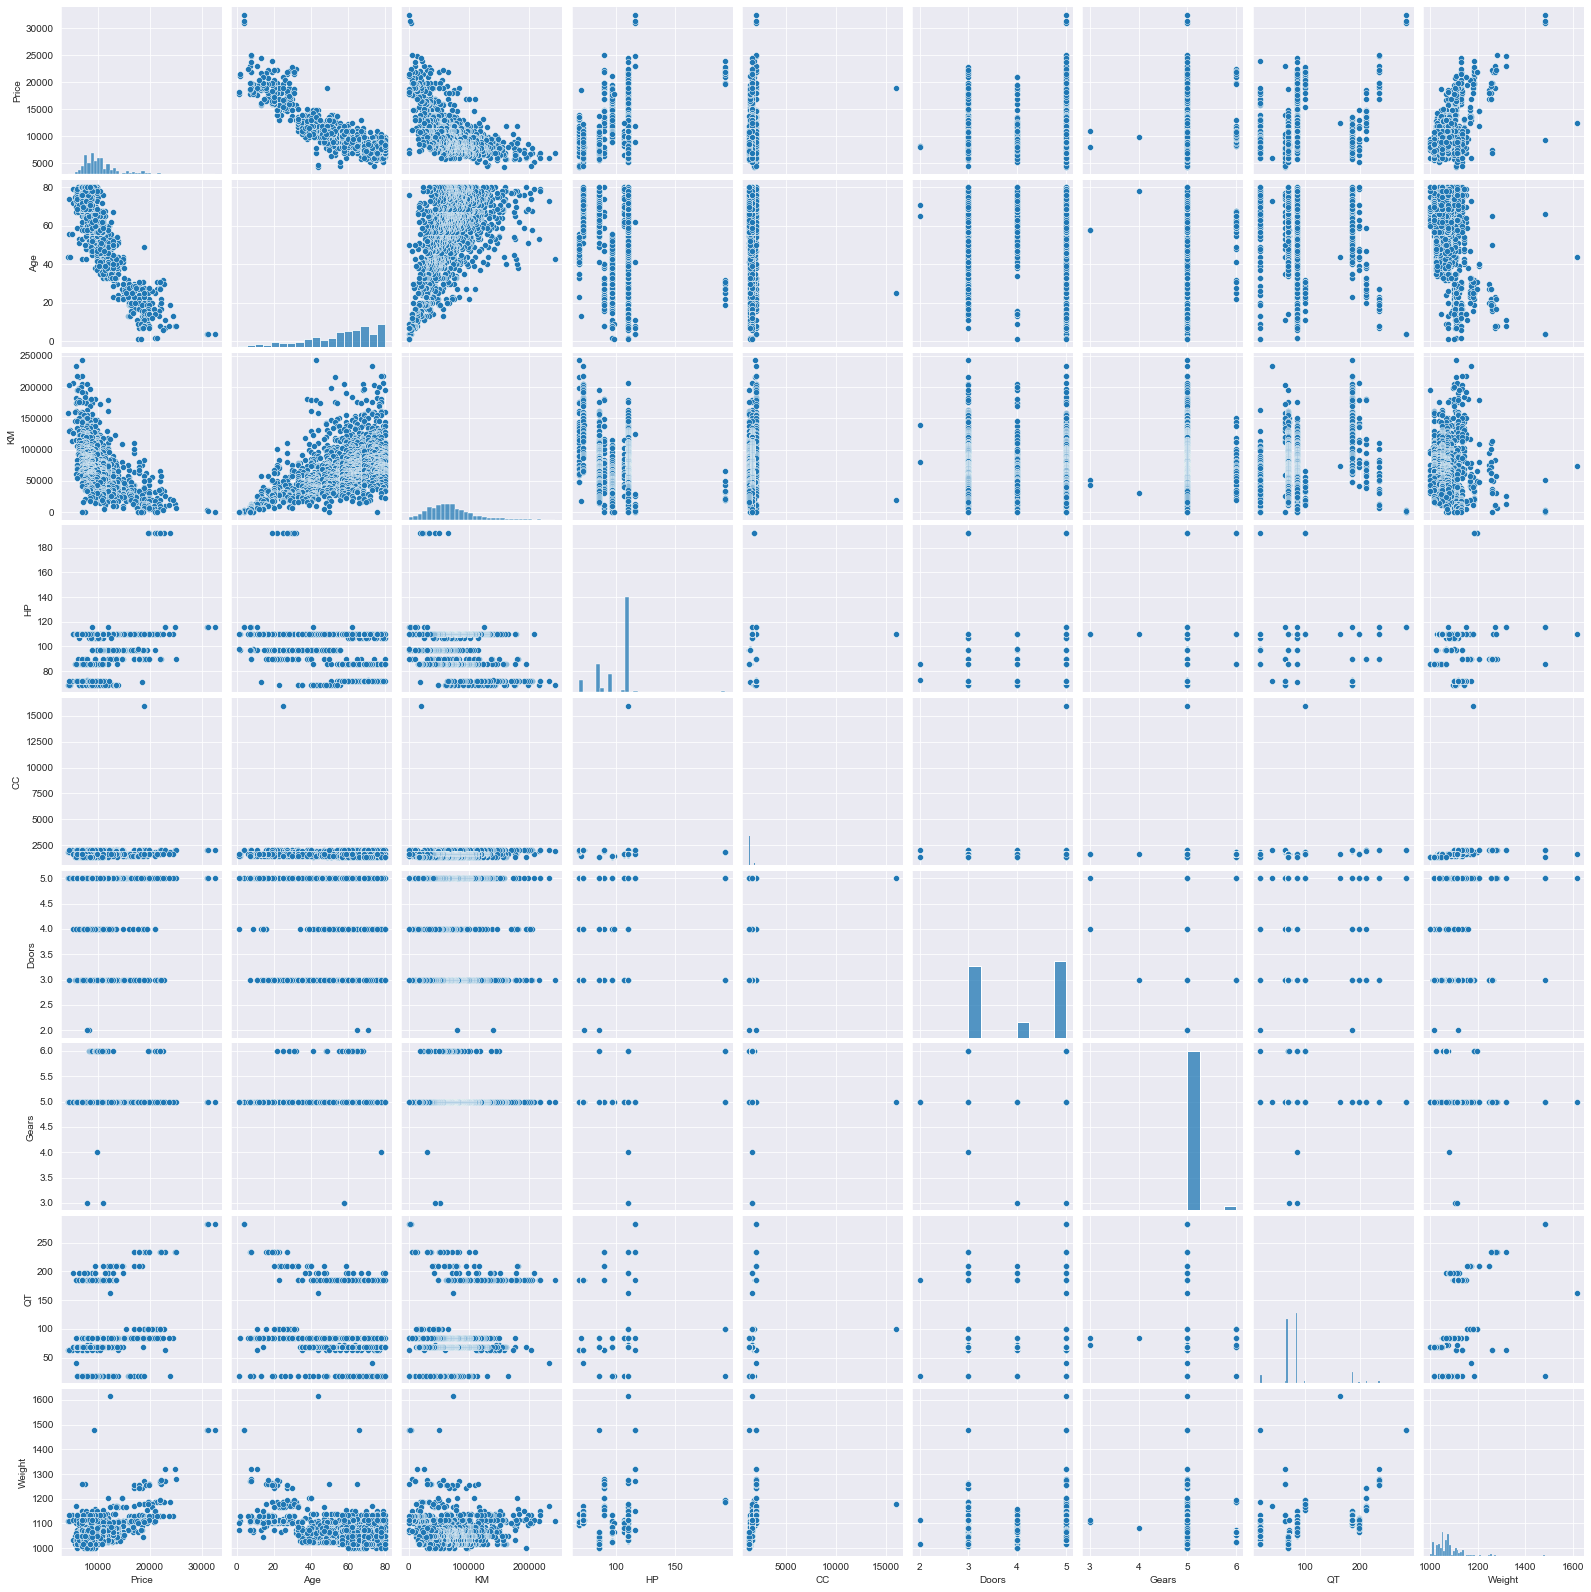

In [23]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota3)

In [24]:
model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=toyota3).fit()
model

In [25]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [26]:
model.tvalues , np.round(model.pvalues,6)

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64,
 Intercept    0.000111
 Age          0.000000
 KM           0.000000
 HP           0.000000
 CC           0.188239
 Doors        0.981644
 Gears        0.002452
 QT           0.003290
 Weight       0.000000
 dtype: float64)

In [27]:
model.rsquared , model.rsquared_adj

(0.8625200256947, 0.8617487495415146)

In [28]:
mlr_c=smf.ols('Price~CC',data=toyota3).fit()
mlr_c.tvalues , mlr_c.pvalues


(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [29]:
mlr_d=smf.ols('Price~Doors',data=toyota3).fit()
mlr_d.tvalues , mlr_d.pvalues 


(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [30]:
mlr_cd=smf.ols('Price~CC+Doors',data=toyota3).fit()
mlr_cd.tvalues , mlr_cd.pvalues 


(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

In [31]:
ra_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyota3).fit().rsquared
vif_age=1/(1-ra_age)

ra_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=toyota3).fit().rsquared
vif_KM=1/(1-ra_KM)

ra_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=toyota3).fit().rsquared
vif_HP=1/(1-ra_HP)

ra_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=toyota3).fit().rsquared
vif_CC=1/(1-ra_CC)

ra_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=toyota3).fit().rsquared
vif_DR=1/(1-ra_DR)

ra_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=toyota3).fit().rsquared
vif_GR=1/(1-ra_GR)

ra_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=toyota3).fit().rsquared
vif_QT=1/(1-ra_QT)

ra_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=toyota3).fit().rsquared
vif_WT=1/(1-ra_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


# QQ Plot

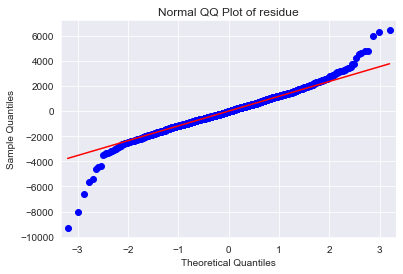

In [32]:
sm.qqplot(model.resid,line='q')
plt.title("Normal QQ Plot of residue")
plt.show()

In [34]:
list(np.where(model.resid > 6000))

[array([109, 146, 522], dtype=int64)]

In [35]:
list(np. where (model.resid < -6000))

[array([220, 600, 959], dtype=int64)]

In [39]:
def std_value(val):
    return (val-val.mean())/val.std()

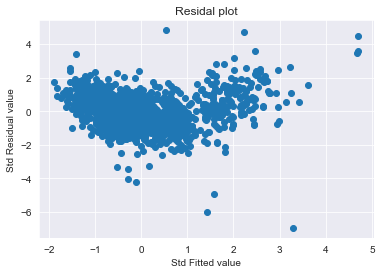

In [40]:
plt.scatter(std_value(model.fittedvalues),std_value(model.resid))
plt.title("Residal plot")
plt.xlabel("Std Fitted value")
plt.ylabel("Std Residual value")
plt.show()

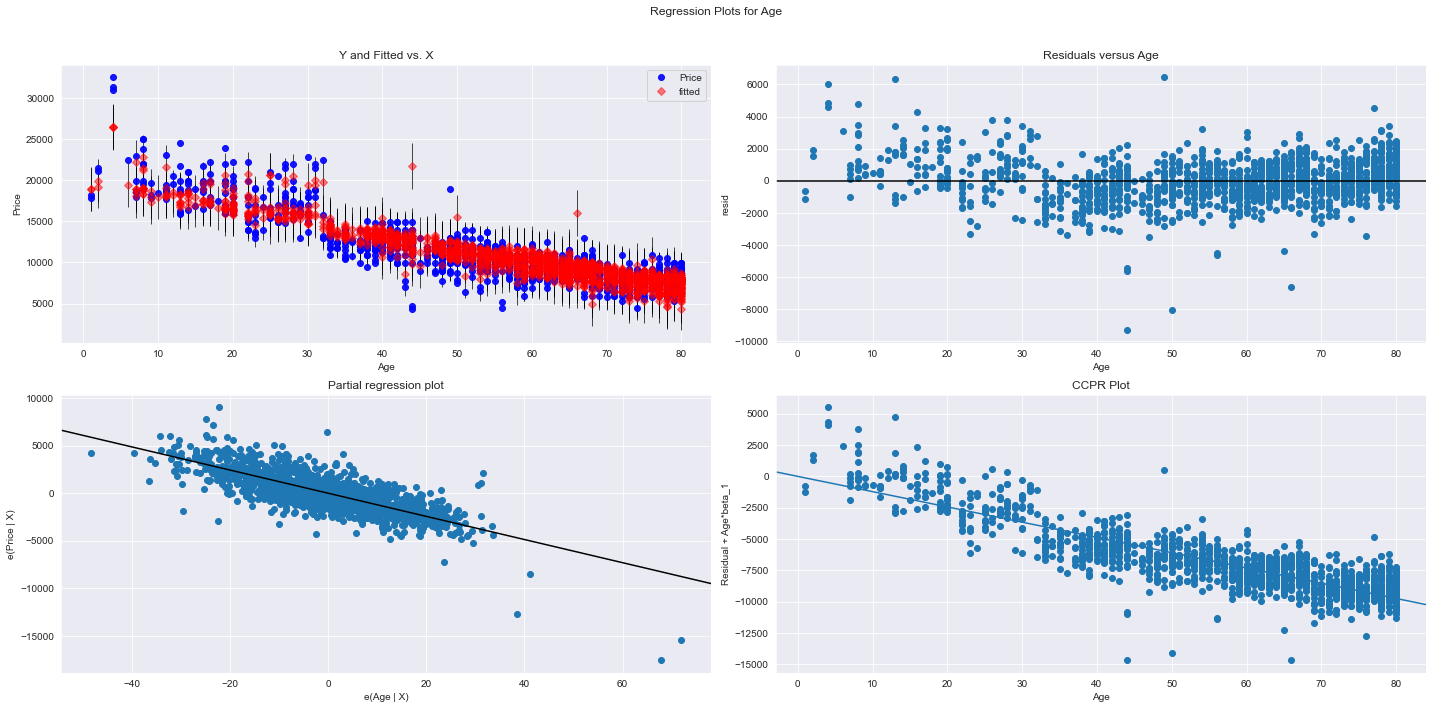

In [41]:
fig1=plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model,"Age",fig=fig1)
plt.show()

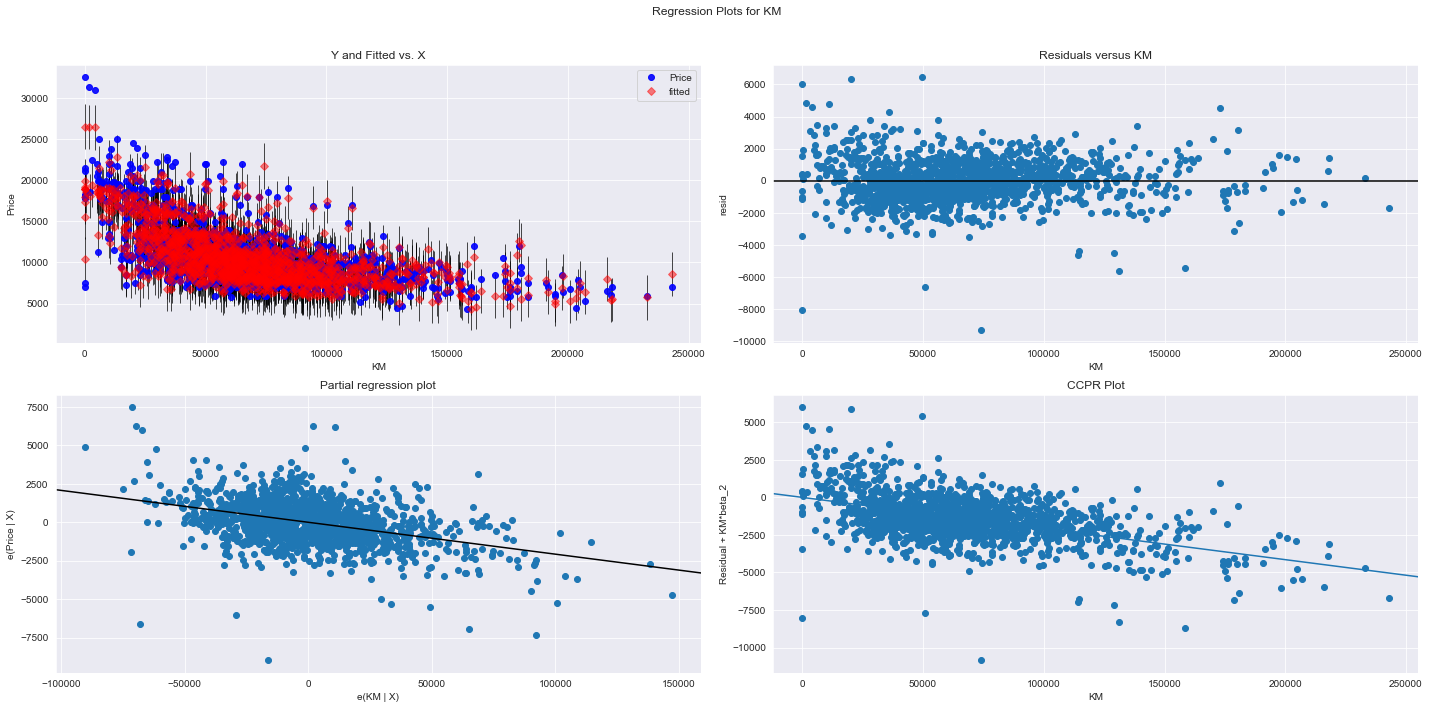

In [42]:
fig1=plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model,"KM",fig=fig1)
plt.show()

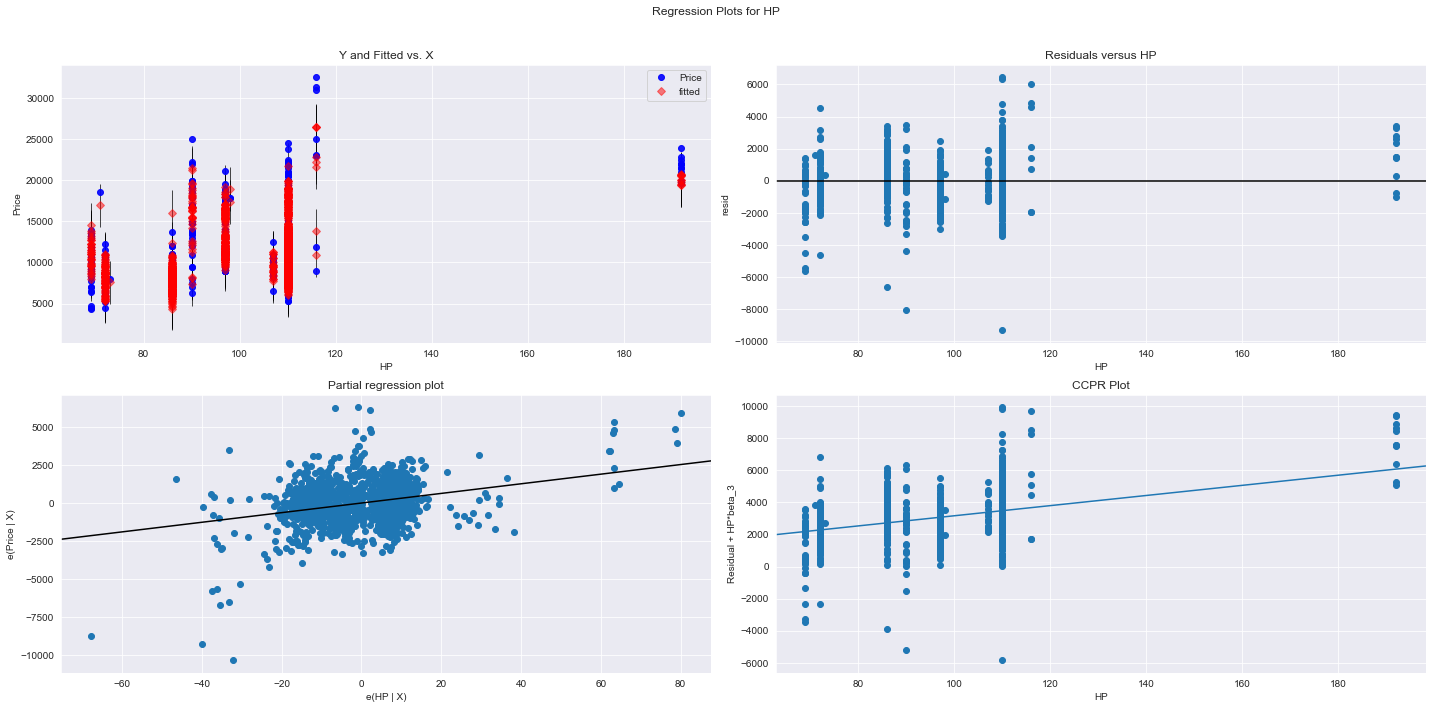

In [43]:
fig1=plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model,"HP",fig=fig1)
plt.show()

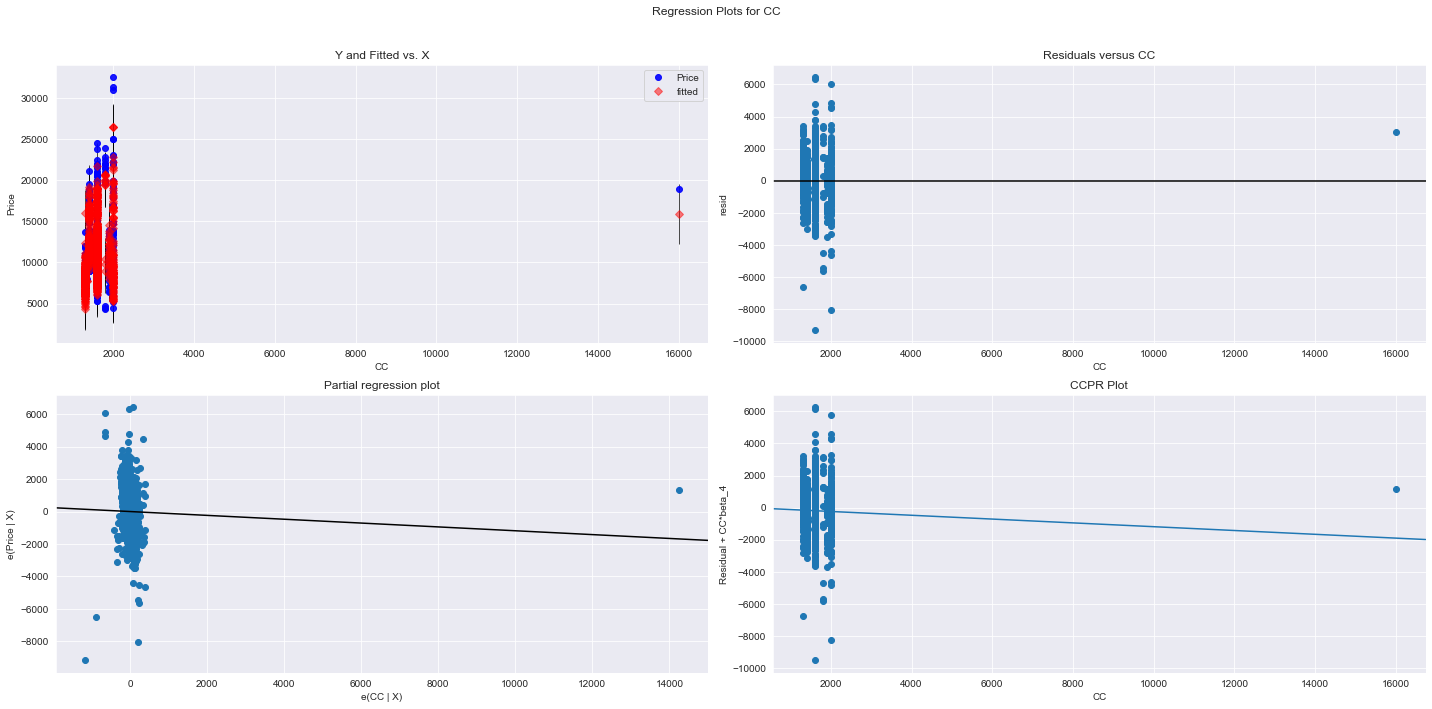

In [44]:
fig1=plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model,"CC",fig=fig1)
plt.show()

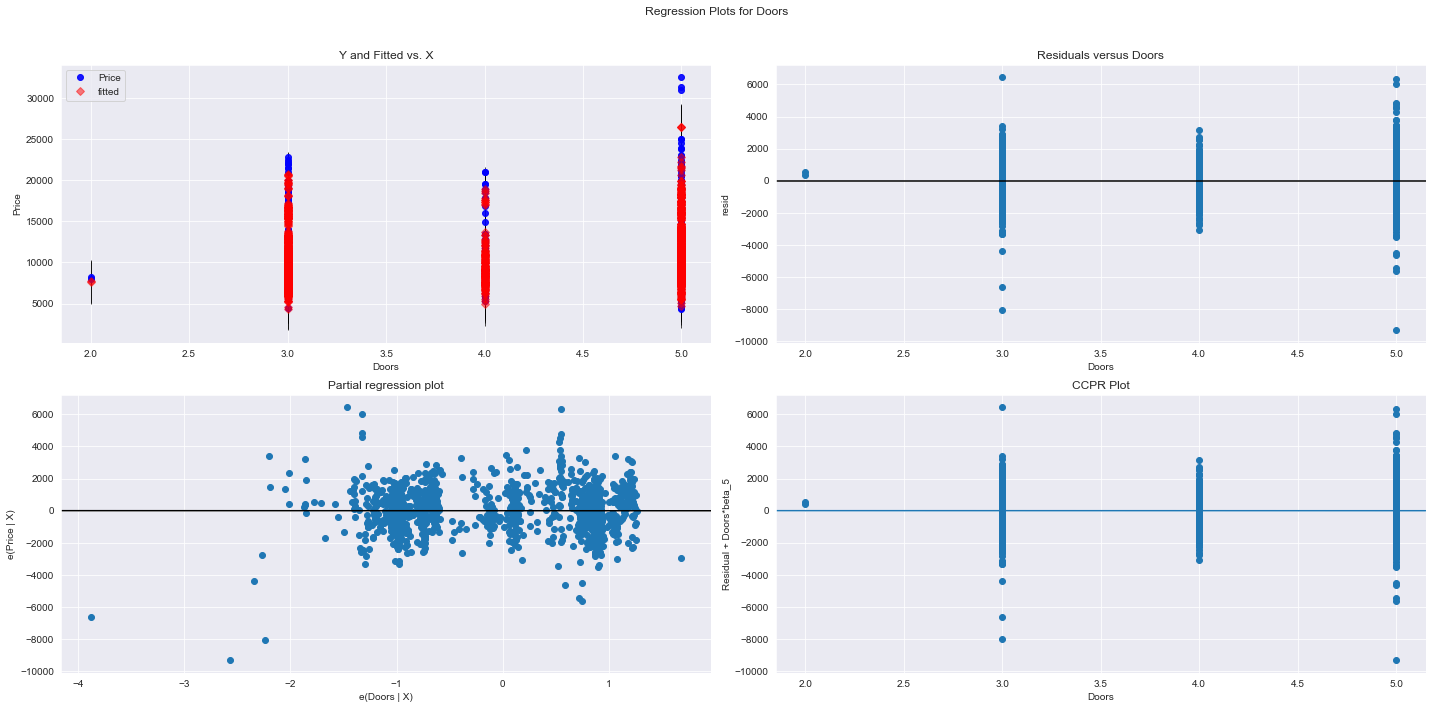

In [45]:
fig1=plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model,"Doors",fig=fig1)
plt.show()

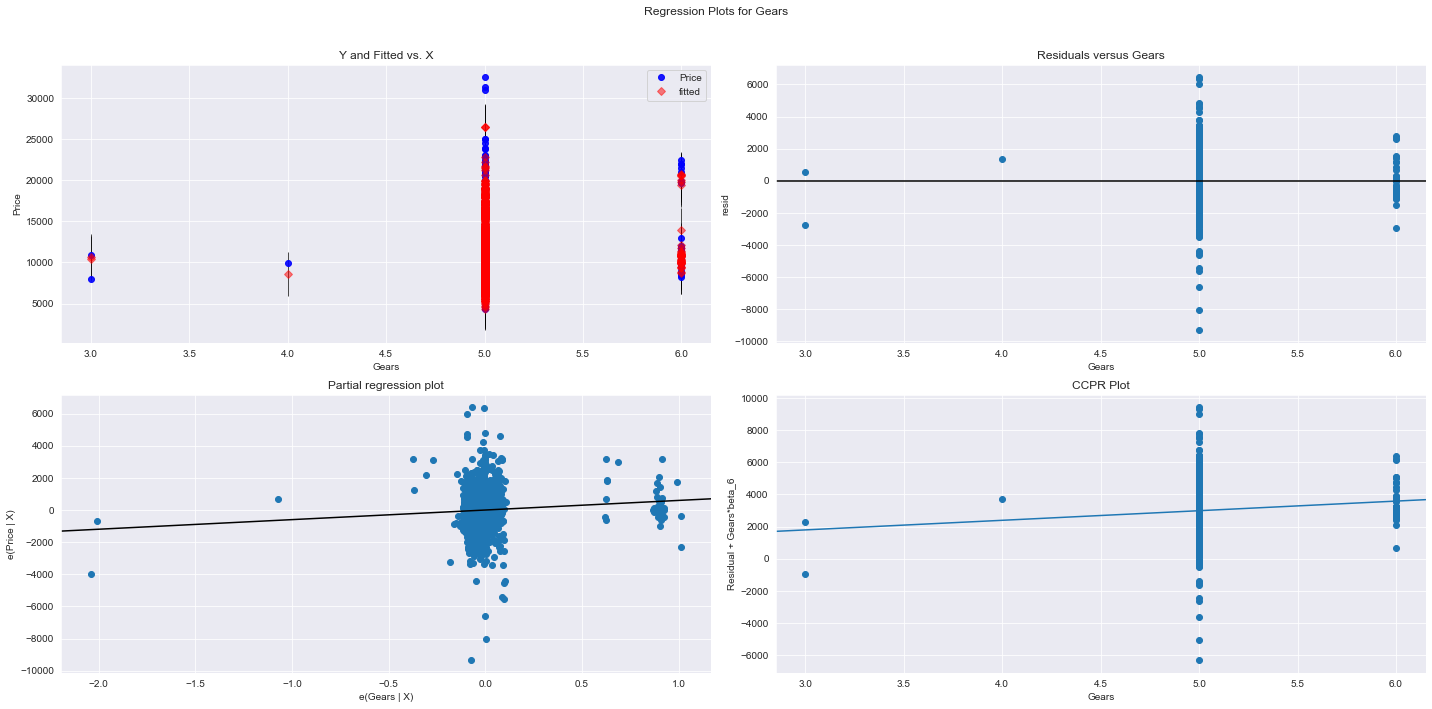

In [46]:
fig1=plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model,"Gears",fig=fig1)
plt.show()

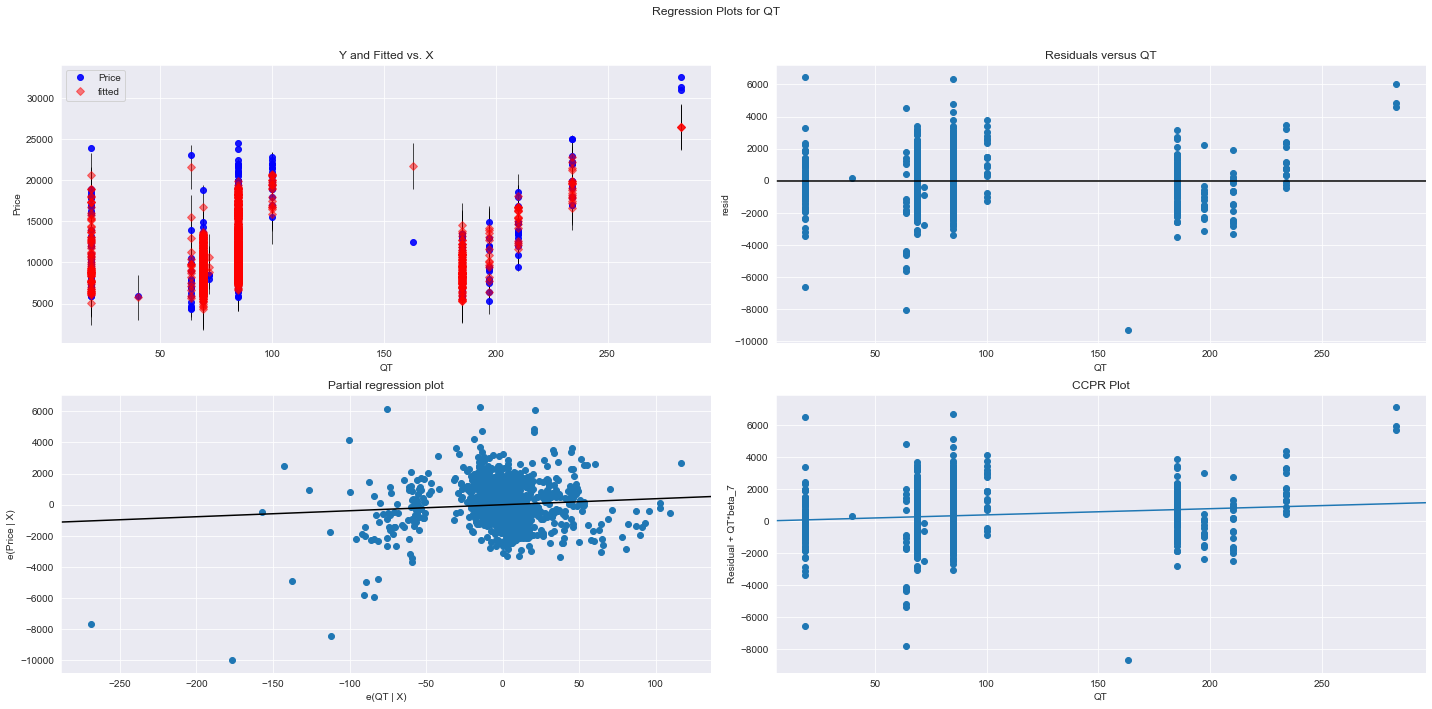

In [47]:
fig1=plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model,"QT",fig=fig1)
plt.show()

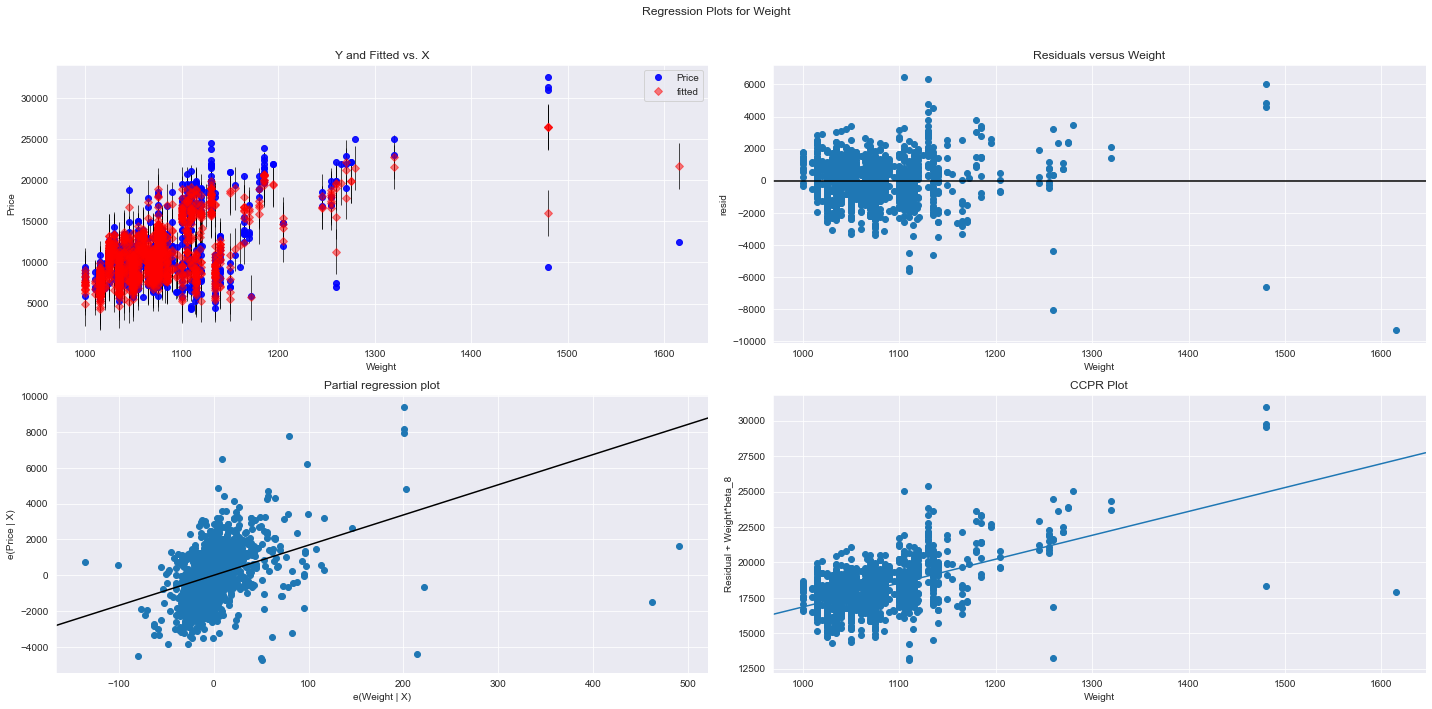

In [48]:
fig1=plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model,"Weight",fig=fig1)
plt.show()

# Cook's Distance

In [49]:
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

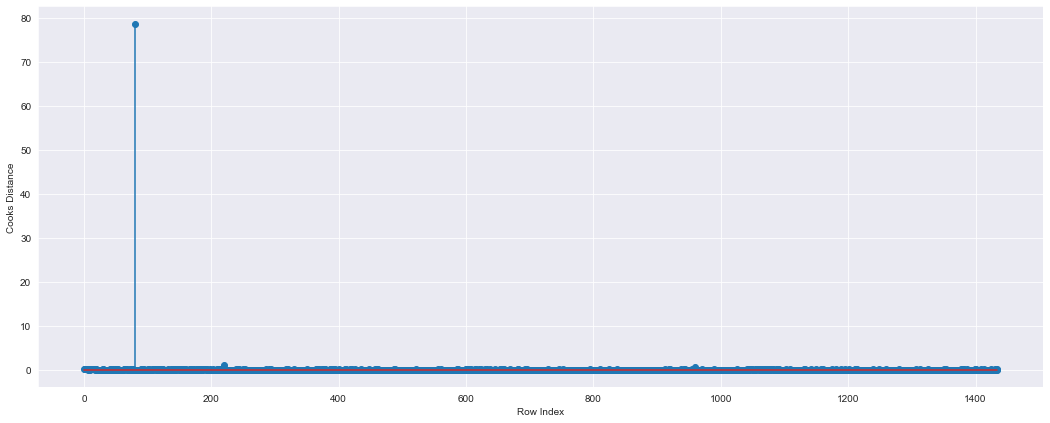

In [50]:
fig2=plt.figure(figsize=(18,7))
plt.stem(np.arange(len(toyota3)),np.round(c,4))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [51]:
np.argmax(c) , np.max(c)

(80, 78.7295058224916)

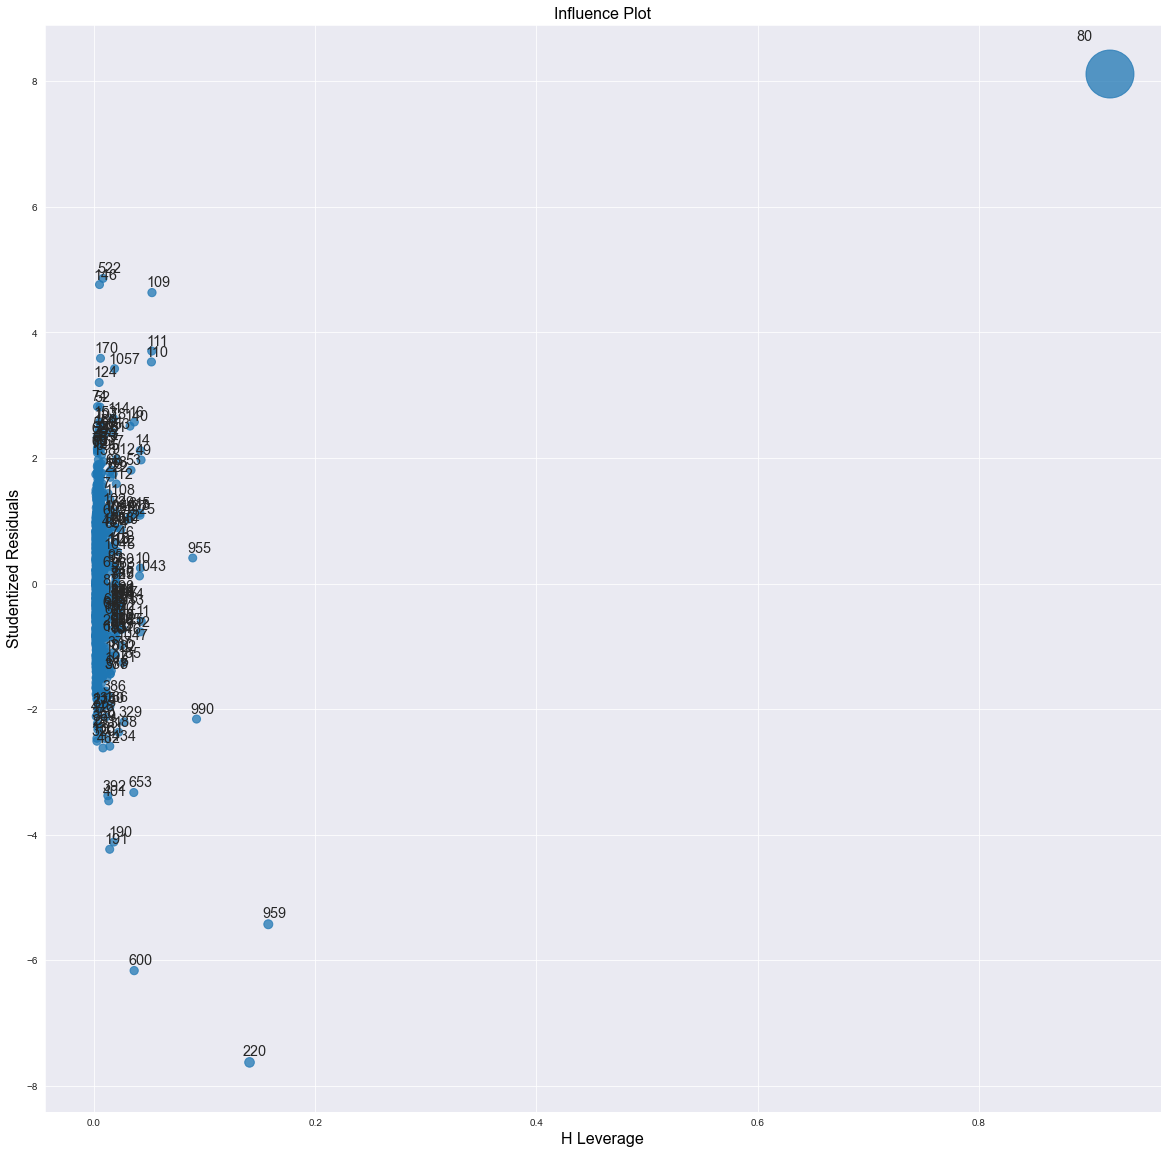

In [53]:
fig3,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax=ax)

In [55]:
a=toyota3.shape[1]
b=toyota3.shape[0]
lcutoff=(3*(a+1))/b
lcutoff

0.020905923344947737

In [56]:
toyota3[toyota3.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [57]:
toyota4=toyota3.copy()
toyota4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [59]:
toyota5=toyota4.drop(toyota4.index[[80]],axis=0).reset_index(drop=True)
toyota5

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [60]:
while np.max(c) > 0.5:
    model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=toyota5).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyota5=toyota5.drop(toyota5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyota5
else:
    final_model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=toyota5).fit()
    final_model.rsquared , final_model.aic
    print("Model improved a accuracy",final_model.rsquared)

Model improved a accuracy 0.8882395145171204


In [62]:
if np.max(c) > 0.5:
    model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=toyota5).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyota5=toyota5.drop(toyota5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyota5
elif np.max(c) < 0.5:
    final_model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=toyota5).fit()
    final_model.rsquared , final_model.aic
    print("Model improved a accuracy",final_model.rsquared)

Model improved a accuracy 0.8882395145171204


In [63]:
final_model.rsquared

0.8882395145171204

In [64]:
toyota5

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


# Model Prediction

In [68]:
new_data=pd.DataFrame({"Age":15,"KM":35000,"HP":76,"CC":1200,"Doors":3,"Gears":6,"QT":72,"Weight":1000},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,15,35000,76,1200,3,6,72,1000


In [69]:
final_model.predict(new_data)

0    14568.16752
dtype: float64

In [70]:
prediction=final_model.predict(toyota5)
prediction

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64